In [7]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint


# Dynamický systém

Funkcia realizujúca
\begin{equation}
\dot x(t) = A x(t) + b u(t)
\end{equation}

In [8]:
def fcn_LTIsys(t, x, A, b, u):

    dotx = A @ x + b @ u

    return dotx

# Základná simulácia

Východisková situácia pre použitie ODE solvera.

Vstupný signál $u(t)$ je konštantný.

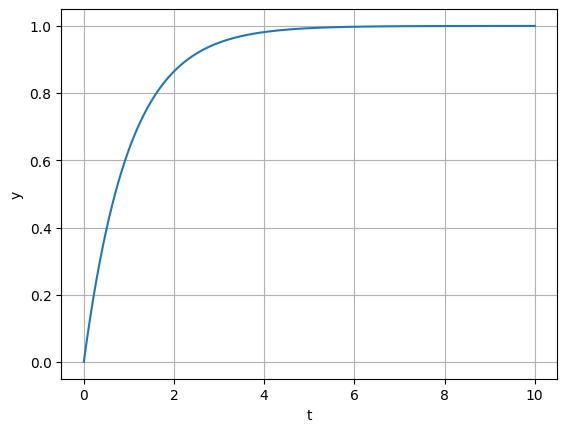

In [9]:
#-----------------------------------------
# Time setup

sim_t_start = 0
sim_t_final = 10
sim_T_s = 0.01
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

#-----------------------------------------
# Parametre riadeného systému

A = np.array([[-1]])
b = np.array([[1]])
c = np.array([[1]])


#-----------------------------------------
# Začiatočné podmienky riadeného systému

x_0 = np.array([0]) # Initial condition for odeint must be one-dimensional


#-----------------------------------------
# Vstupný signál riadeného systému

sig_u = np.array([1])


#-----------------------------------------
# Použitie ODE solvera

timespan = np.linspace(sim_t_start, sim_t_final, sim_finalIndex)

odeOUT = odeint(
    fcn_LTIsys,
    x_0,
    timespan,
    tfirst=True,
    args=(A, b, sig_u), # !!!! aj sig_u je externe nastaviteľný „parameter“
    )

sig_y = np.matmul(c.T, odeOUT.T).T


#-----------------------------------------
# Plot

plt.figure()
plt.plot(timespan, sig_y)
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

# Cyklus „krátkych“ simulácií

Cieľ:  dosiahnuť možnosť meniť vstupný signál a nemať ho len konštantný.

Namiesto jedného volania ODE solvera, pre ktoré je raz dané akú hodnotu bude mať vstupný signál, sa použije viacero volaní ODE solvera, pričom sa vždy je možné zmeniť hodnotu vstupného signálu.

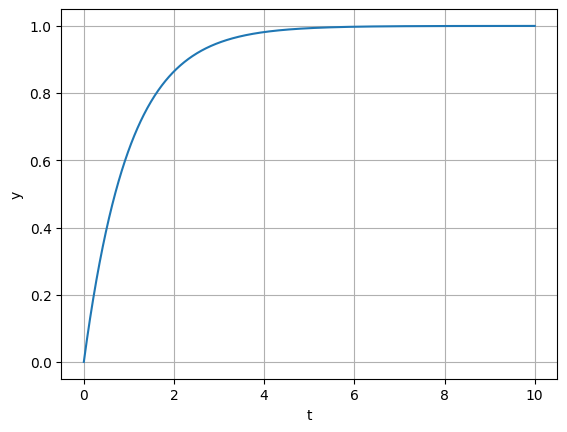

In [10]:
#-----------------------------------------
# Time setup

sim_t_start = 0
sim_t_final = 10
sim_T_s = 0.01
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

#-----------------------------------------
# Parametre riadeného systému

A = np.array([[-1]])
b = np.array([[1]])
c = np.array([[1]])


#-----------------------------------------
# Začiatočné podmienky riadeného systému

x_0 = np.array([0])


#-----------------------------------------
# Vstupný signál riadeného systému

sig_u = np.array([1])


#-----------------------------------------
# Použitie ODE solvera ale „po častiach“

# mem_... sú premenné pre zapamätanie danej premennej z predchádzajúceho kroku
mem_t = sim_t_start
mem_x = x_0

################################
# „Logovanie“
t_log = np.zeros(sim_finalIndex)
t_log[0] = mem_t
y_log = np.zeros(sim_finalIndex)
y_log[0] = np.matmul(c.T, mem_x)[0]
################################


#########################################################
timespan = np.zeros(2)

for idx in range(1, int(sim_finalIndex)): ###### LOOP !!! ######

    timespan[0] = mem_t
    timespan[1] = mem_t + sim_T_s


    # Volanie ODE solvera.
    # Na základe „hodnôt z predchádzajúceho kroku“ sa vypočítajú hodnoty pre
    # aktuálny krok

    #-------------------------------
    # Simulácia riadeného systému...
    # in: (k-1) hodnoty
    # out: k hodnoty

    odeOUT = odeint(
        fcn_LTIsys,
        mem_x,
        timespan,
        tfirst=True,
        args=(A, b, sig_u),
        )

    sig_y = np.matmul(c.T, odeOUT[-1])
    #-------------------------------



    # ... tu je priestor pre zmenu vstupného signálu u ...
    # (k-1) hodnota u už bola použitá pri sim. riadeného systému
    # Ak tu stanovíme nejaké u, tak to bude u, ktoré sa použije v ďalšom kroku



    #-------------------------
    mem_t = timespan[-1]
    mem_x = odeOUT[-1]

    ##########################
    # „Logovanie“
    t_log[idx] = mem_t
    y_log[idx] = sig_y[0]
    ##########################

#########################################################


#-----------------------------------------
# Plot

plt.figure()
plt.plot(t_log, y_log)
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

# Príklad meniaceho sa vstupného signálu

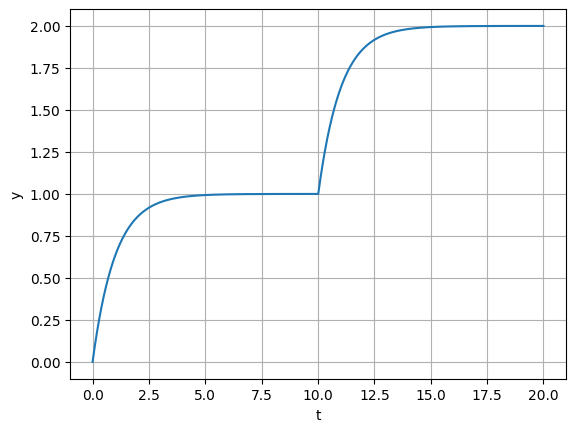

In [11]:
#-----------------------------------------
# Time setup

sim_t_start = 0
sim_t_final = 20
sim_T_s = 0.01
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

#-----------------------------------------
# Parametre riadeného systému

A = np.array([[-1]])
b = np.array([[1]])
c = np.array([[1]])


#-----------------------------------------
# Začiatočné podmienky riadeného systému

x_0 = np.array([0])


#-----------------------------------------
# Vstupný signál riadeného systému

sig_u = np.array([1])


#-----------------------------------------
# Použitie ODE solvera ale „po častiach“

# mem_... sú premenné pre zapamätanie danej premennej z predchádzajúceho kroku
mem_t = sim_t_start
mem_x = x_0
mem_u = sig_u

################################
# „Logovanie“
t_log = np.zeros(sim_finalIndex)
t_log[0] = mem_t
y_log = np.zeros(sim_finalIndex)
y_log[0] = np.matmul(c.T, mem_x)[0]
################################




#########################################################
timespan = np.zeros(2)

for idx in range(1, int(sim_finalIndex)): ###### LOOP !!! ######

    timespan[0] = mem_t
    timespan[1] = mem_t + sim_T_s

    #-------------------------------
    # Simulácia riadeného systému...

    odeOUT = odeint(
        fcn_LTIsys,
        mem_x,
        timespan,
        tfirst=True,
        args=(A, b, mem_u), # sig_u je teraz zapamätaná hodnota z predchádzajúceho kroku
        )

    sig_y = np.matmul(c.T, odeOUT[-1])



    #-------------------------------



    # ... tu je priestor pre zmenu vstupného signálu u ...

    if timespan[1] >= 10: # ak čas 10 sekúnd a viac, tak zmeň u

        sig_u = np.array([2])

    # ... na miesto tejto podmienky by tu mohol byť napr. PID regulátor ...



    #-------------------------
    mem_t = timespan[-1]
    mem_x = odeOUT[-1]
    mem_u = sig_u

    ##########################
    # „Logovanie“
    t_log[idx] = mem_t
    y_log[idx] = sig_y[0]
    ##########################

#########################################################


#-----------------------------------------
# Plot

plt.figure()
plt.plot(t_log, y_log)
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

# Príklad s PID regulátorom

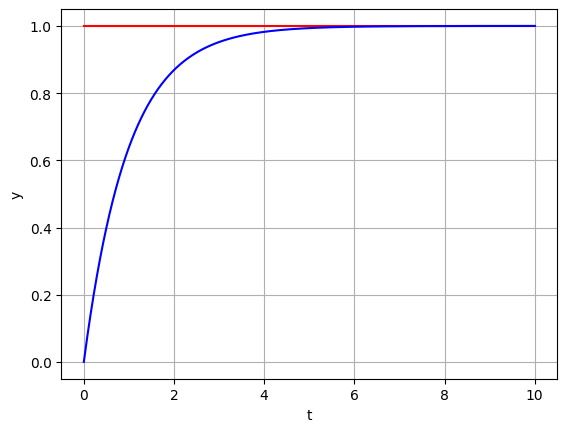

In [12]:
#-----------------------------------------
# Time setup

sim_t_start = 0
sim_t_final = 10
sim_T_s = 0.01
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

#-----------------------------------------
# Parametre riadeného systému

A = np.array([[-1]])
b = np.array([[1]])
c = np.array([[1]])

#-----------------------------------------
# Parametre PID

P = 1
I = 1
D = 0

#-----------------------------------------
# Začiatočné podmienky riadeného systému

x_0 = np.array([0])


#-----------------------------------------
# Vstupný signál URO

sig_w = np.array([1])

#-----------------------------------------
# Regulačná odchýlka (pre „nultý krok")

sig_e = sig_w - np.matmul(c.T, x_0)
sig_e_int = 0 + sig_e * sim_T_s
sig_e_der = (sig_e - 0) / sim_T_s


#-----------------------------------------
# Výpočet akčného zásahu (pre „nultý krok")

sig_u = P * sig_e + I * sig_e_int + D * sig_e_der



#-----------------------------------------
# mem_... sú premenné pre zapamätanie danej premennej z predchádzajúceho kroku

mem_t = sim_t_start
mem_x = x_0
mem_u = sig_u

mem_e = sig_e
mem_e_int = sig_e_int
mem_y = np.matmul(c.T, mem_x)


################################
# „Logovanie“
t_log = np.zeros(sim_finalIndex)
t_log[0] = mem_t
y_log = np.zeros(sim_finalIndex)
y_log[0] = np.matmul(c.T, mem_x)[0]
################################




#########################################################
timespan = np.zeros(2)

for idx in range(1, int(sim_finalIndex)): ###### LOOP !!! ######

    timespan[0] = mem_t
    timespan[1] = mem_t + sim_T_s

    #-------------------------------
    # Simulácia riadeného systému...

    odeOUT = odeint(
        fcn_LTIsys,
        mem_x,
        timespan,
        tfirst=True,
        args=(A, b, mem_u), # sig_u je teraz zapamätaná hodnota z predchádzajúceho kroku
        )

    sig_y = np.matmul(c.T, odeOUT[-1])



    #-------------------------------
    # Implementácia riadiaceho systému

    sig_e = sig_w - mem_y
    sig_e_int = mem_e_int + sig_e * sim_T_s
    sig_e_der = (sig_e - mem_e) / sim_T_s

    sig_u = P * mem_e + I * mem_e_int + D * sig_e_der





    #-------------------------
    mem_t = timespan[-1]
    mem_x = odeOUT[-1]
    mem_u = sig_u

    mem_e = sig_e
    mem_e_int = sig_e_int
    mem_y = sig_y

    ##########################
    # „Logovanie“
    t_log[idx] = mem_t
    y_log[idx] = sig_y[0]
    ##########################

#########################################################


#-----------------------------------------
# Plot


plt.figure()
plt.plot([t_log[0], t_log[-1]], [sig_w, sig_w], 'r')
plt.plot(t_log, y_log, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()